In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
data = pd.read_csv('amazon_alexa.tsv',sep='\t')

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Text(0.5, 1.0, 'feedback = 0')

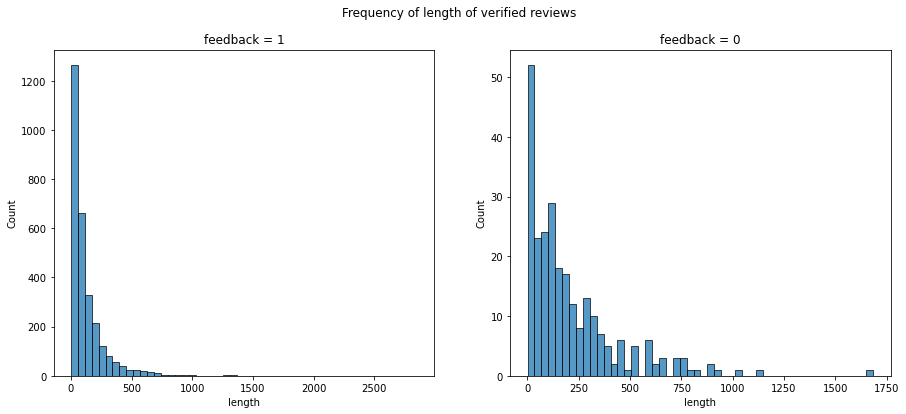

In [23]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Frequency of length of verified reviews')

sns.histplot(data=data[data['feedback'] == 1], x='length',bins=50, ax=axes[0])
axes[0].set_title('feedback = 1')

sns.histplot(data=data[data['feedback'] == 0], x='length',bins=50, ax=axes[1])
axes[1].set_title('feedback = 0')

<AxesSubplot:xlabel='feedback', ylabel='count'>

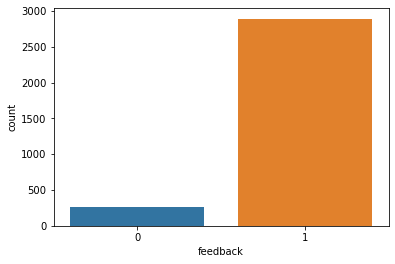

In [14]:
sns.countplot(x=data['feedback'])

In [49]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = stopwords.words('english')
lem = WordNetLemmatizer()

In [79]:
reviews = data['verified_reviews']

reviews = reviews.apply(str.lower)

def alnum_space(sent):
    for c in sent:
        if c.isalpha() or c == ' ':
            pass
        else:
            sent = sent.replace(c,'')
    return sent

reviews = reviews.apply(alnum_space)            
reviews = reviews.apply(str.split)
reviews = reviews.apply(lambda words: [lem.lemmatize(c) for c in words if c not in stop])
reviews = reviews.apply(lambda list: ' '.join(list))

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(reviews)
y = data['feedback'].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 15,  39],
       [  4, 572]])